## Sentiment Analysis on Yelp Reviews Dataset
This script reads all reviews from the `odyssey_reviews.csv` and performs sentiment analysis. Reviews are categorized into Postive, Netural, or Negative cateogry. The final dataset (with business ids) are saved to `datasets/odyssey_sentiment.csv` and the grouped datasets to `datasets/odyssey_sentiment_grp.csv`.


## Import Packages and Data Preprocessing

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('vader_lexicon')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [7]:
reviews_df = pd.read_csv("datasets/odyssey_reviews.csv")
del(reviews_df['Unnamed: 0'])

In [4]:
# Change 'text' column type from float to str
reviews_df['text'] = reviews_df['text'].astype(str) 
# Create a new column text length to quantify the length of the review
reviews_df['text length'] = reviews_df['text'].apply(len)

In [5]:
# Check if there is missing data
list(reviews_df)
reviews_df.isna().sum()

Unnamed: 0     0
business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
text length    0
dtype: int64

Labelling our review data
We will be using NTLK's Vader Sentiment Analyzer to give the piece of text a ranking: positive, negative or neutral. We will create a SIA (Senitment Intensity Analyzer) to categorize Yelp reviews.
Next, we will be using the polarity_scores method to obtain the sentiment.

In [8]:
print(reviews_df.head())

              business_id  cool        date  funny               review_id  \
0  jtQARsP6P-LbkyjbO1qNGg     1  2014-10-23      1  LZp4UX5zK3e-c5ZGSeo3kA   
1  EAwh1OmG6t6p3nRaZOW_AA     0  2011-02-25      0  wcqt0III88LEcm19IxFFyA   
2  faPVqws-x-5k2CQKDNtHxw     0  2015-03-25      2  QHueaxKHuBpbDOkWb0Cyfw   
3  XiN6fI8I3Mzg2nPRJ9ukRQ     0  2017-09-17      0  1QR6BgzXhpo7ngGEw-BW4w   
4  JPfi__QJAaRzmfh5aOyFEw     0  2017-01-31      0  mqhCY5oLA1LXP6gZ3JQDTQ   

   stars                                               text  useful  \
0      1  Terrible. Dry corn bread. Rib tips were all fa...       3   
1      4  Ribs = amazing\r\n2 hour wait time= not so ama...       0   
2      1  People please...the only good thing about this...       2   
3      5  Had the ruby salad, carpaccio, salmon, and rav...       0   
4      3  The spicy wonton was my favorite. We ordered a...       0   

                  user_id  
0  msQe1u7Z_XuqjGoqhB0J5g  
1  msQe1u7Z_XuqjGoqhB0J5g  
2  0AIj432Mvowwghnpu

In [10]:
sia = SIA()
results = []

for business_id, line, stars in zip(reviews_df['business_id'], reviews_df['text'],reviews_df['stars']):
    pol_score = sia.polarity_scores(line)
    pol_score['review'] = line
    pol_score['business_id'] = business_id
    pol_score['stars'] = stars
    results.append(pol_score)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The dataframe we create below will consist of 7 columns: business_id, compound, negative, neutral, positive, review, stars. Compound is a single number that scores the review sentiment, which will range from -1 to +1, where -1 indicates very negative and +1 indicates very positive. 

We will consider reviews with a compound value greater than 0.75 as positive and less than 0.3 as negative. We have chosen this range through trial and error.  We chose a higher value, as we discovered that there is a relatively high proportion of positive reviews. 


In [12]:
# Create a df for our results:
temp_df = pd.DataFrame.from_records(results)
print(temp_df)


# Categorising postive and negative sentiment:
temp_df['label'] = 0
temp_df.loc[temp_df['compound'] > 0.75, 'label'] = 1
temp_df.loc[temp_df['compound'] < 0.3, 'label'] = -1
temp_df.head()


temp_df.groupby(['business_id'])[['compound']].mean() 

                   business_id  compound    neg    neu    pos  \
0       jtQARsP6P-LbkyjbO1qNGg   -0.1779  0.148  0.724  0.128   
1       EAwh1OmG6t6p3nRaZOW_AA    0.9660  0.000  0.725  0.275   
2       faPVqws-x-5k2CQKDNtHxw    0.7749  0.013  0.913  0.074   
3       XiN6fI8I3Mzg2nPRJ9ukRQ    0.9109  0.000  0.666  0.334   
4       JPfi__QJAaRzmfh5aOyFEw    0.8462  0.000  0.816  0.184   
5       OR6iRk0vrMzE-1gLg-WYrw    0.9836  0.037  0.794  0.169   
6       yTWSFoGjkK6pl7kJm8f0Dg    0.9933  0.035  0.848  0.117   
7       d_Go5TsiFMIRtCE6XS8Sjw    0.9974  0.006  0.823  0.171   
8       wVc3g-YfyDvkOLDecpr4DA    0.9992  0.008  0.778  0.214   
9       ioEdisf6TTCoUbfQDnUCjA   -0.3578  0.189  0.662  0.150   
10      Uw-kIS3HTuAohfg0edQZ3Q    0.9977  0.057  0.738  0.205   
11      TFftsYkRIUtdo6ZhRwJ2lQ    0.8976  0.055  0.870  0.075   
12      tEfmHuo_dNanyTaC5PyoOQ    0.9978  0.009  0.838  0.153   
13      uF86ZhygpBEGr3CudNemYA   -0.9937  0.125  0.799  0.076   
14      AercPW1B2YVNK3Usi

,compound
business_id,
--SrzpvFLwP_YFwB_Cetow,0.675843
-1m9o3vGRA8IBPNvNqKLmA,0.911014
-3zffZUHoY8bQjGfPSoBKQ,0.786762
-7-uHFjQLH_uxPauYtd8iA,0.647320
-CLTZ0cO-ooKDDmXHFoGMg,0.753323
-CQokjildrY7UZezXCdEBw,0.878166
-D2vGSq_SvuCmHdqsDxzeA,0.649619
-EohS3nXZGl6odE9Lx5BSw,-0.213440
-FcZY7a7qgxTUlTvwuyJnQ,0.620889


In [13]:
# Save our finalised dataset into a separate file: review_df.csv
review_dataset = temp_df[['business_id','review', 'label','stars']]
review_dataset = review_dataset.rename(index=str, columns={"review": "text"})
review_dataset.to_csv('datasets/odyssey_sentiment.csv', mode='a', encoding='utf-8', index=False)
print(review_dataset.head())

              business_id                                               text  \
0  jtQARsP6P-LbkyjbO1qNGg  Terrible. Dry corn bread. Rib tips were all fa...   
1  EAwh1OmG6t6p3nRaZOW_AA  Ribs = amazing\r\n2 hour wait time= not so ama...   
2  faPVqws-x-5k2CQKDNtHxw  People please...the only good thing about this...   
3  XiN6fI8I3Mzg2nPRJ9ukRQ  Had the ruby salad, carpaccio, salmon, and rav...   
4  JPfi__QJAaRzmfh5aOyFEw  The spicy wonton was my favorite. We ordered a...   

   label  stars  
0     -1      1  
1      1      4  
2      1      1  
3      1      5  
4      1      3  


In [15]:
temp_df.head(500)

,business_id,compound,neg,neu,pos,review,stars,label
0,jtQARsP6P-LbkyjbO1qNGg,-0.1779,0.148,0.724,0.128,Terrible. Dry corn bread. Rib tips were all fa...,1,-1
1,EAwh1OmG6t6p3nRaZOW_AA,0.9660,0.000,0.725,0.275,Ribs = amazing\r\n2 hour wait time= not so ama...,4,1
2,faPVqws-x-5k2CQKDNtHxw,0.7749,0.013,0.913,0.074,People please...the only good thing about this...,1,1
3,XiN6fI8I3Mzg2nPRJ9ukRQ,0.9109,0.000,0.666,0.334,"Had the ruby salad, carpaccio, salmon, and rav...",5,1
4,JPfi__QJAaRzmfh5aOyFEw,0.8462,0.000,0.816,0.184,The spicy wonton was my favorite. We ordered a...,3,1
5,OR6iRk0vrMzE-1gLg-WYrw,0.9836,0.037,0.794,0.169,If you've ever driven by High Park on Bloor st...,2,1
6,yTWSFoGjkK6pl7kJm8f0Dg,0.9933,0.035,0.848,0.117,"Food, like fashion, has a lot to do with trend...",2,1
7,d_Go5TsiFMIRtCE6XS8Sjw,0.9974,0.006,0.823,0.171,Located at the top of the restaurant strip on ...,4,1
8,wVc3g-YfyDvkOLDecpr4DA,0.9992,0.008,0.778,0.214,5 Doors North is my neighbourhood spot. I have...,5,1
9,ioEdisf6TTCoUbfQDnUCjA,-0.3578,0.189,0.662,0.150,One of the worst bar experiences I've ever had...,1,-1


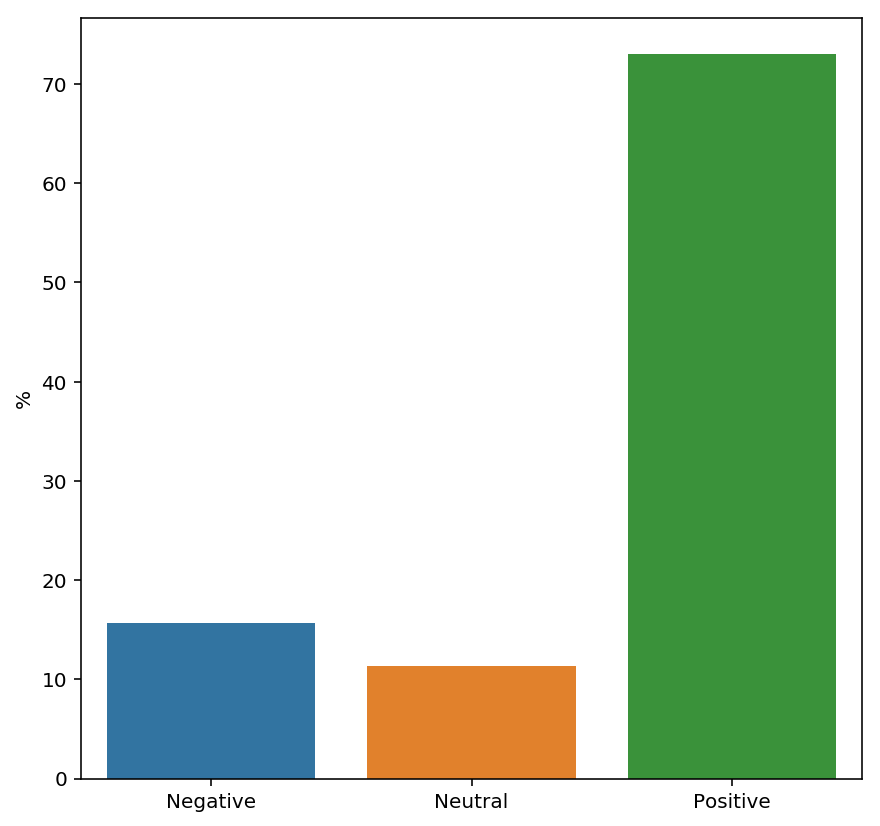

In [17]:
# Visualise our data:
fig, ax = plt.subplots(figsize=(7, 7))

count = temp_df.label.value_counts(normalize=True) * 100

sns.barplot(x=count.index, y=count, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("%")

plt.show()

Noise removal by removing punctuation

In [22]:
review_example=review_dataset['text'].head(5)[0]
print(word_tokenize(review_example, language='english'))

['Terrible', '.', 'Dry', 'corn', 'bread', '.', 'Rib', 'tips', 'were', 'all', 'fat', 'and', 'mushy', 'and', 'had', 'no', 'flavor', '.', 'If', 'you', 'want', 'bbq', 'in', 'this', 'neighborhood', 'go', 'to', 'john', 'mulls', 'roadkill', 'grill', '.', 'Trust', 'me', '.']


In [23]:
# Remove punctuation
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(review_example)

['Terrible',
 'Dry',
 'corn',
 'bread',
 'Rib',
 'tips',
 'were',
 'all',
 'fat',
 'and',
 'mushy',
 'and',
 'had',
 'no',
 'flavor',
 'If',
 'you',
 'want',
 'bbq',
 'in',
 'this',
 'neighborhood',
 'go',
 'to',
 'john',
 'mulls',
 'roadkill',
 'grill',
 'Trust',
 'me']

In [25]:
# In the above tokens there are a lot of irrelevant words (stopwords) like ’the, ’is’, ’and’, ’what’, etc. 
# Those are irrelevant to text sentiment, as they don't provide any valuable information. 
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[:20])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [26]:
# Create a function that reads in reviews and removes stopwords:
def process_text(reviews):
    tokens = []
    for line in reviews:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [28]:
# Tops positive words in the positive set
pos_lines = list(temp_df[temp_df.label == 1].review)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('food', 348766),
 ('good', 320486),
 ('great', 249914),
 ('place', 248627),
 ('service', 199985),
 ('like', 176986),
 ('one', 149313),
 ('time', 144039),
 ('really', 138389),
 ('would', 135586),
 ('back', 130495),
 ('get', 128625),
 ('ordered', 124277),
 ('restaurant', 121787),
 ('go', 120182),
 ('us', 118860),
 ('also', 112375),
 ('chicken', 108754),
 ('vegas', 105483),
 ('menu', 105307)]

In [23]:
# Examine negative words
neg_lines = list(temp_df[temp_df.label == -1].review)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('food', 33578),
 ('service', 19742),
 ('place', 17393),
 ('us', 15776),
 ('get', 14144),
 ('one', 13566),
 ('back', 13303),
 ('time', 12941),
 ('good', 12799),
 ('like', 12329),
 ('would', 12054),
 ('order', 11892),
 ('ordered', 11171),
 ('even', 10993),
 ('go', 10864),
 ('came', 10701),
 ('got', 10326),
 ('minutes', 9662),
 ('never', 9634),
 ('bad', 8412)]

In [29]:
grpd = review_dataset.groupby(['business_id','label']).size().reset_index(name='size')
grpd

,business_id,label,size
0,--SrzpvFLwP_YFwB_Cetow,-1,7
1,--SrzpvFLwP_YFwB_Cetow,0,3
2,--SrzpvFLwP_YFwB_Cetow,1,34
3,-1m9o3vGRA8IBPNvNqKLmA,-1,2
4,-1m9o3vGRA8IBPNvNqKLmA,0,12
5,-1m9o3vGRA8IBPNvNqKLmA,1,153
6,-3zffZUHoY8bQjGfPSoBKQ,-1,64
7,-3zffZUHoY8bQjGfPSoBKQ,0,41
8,-3zffZUHoY8bQjGfPSoBKQ,1,511
9,-7-uHFjQLH_uxPauYtd8iA,-1,2


In [37]:
grpd.to_csv('datasets/odyssey_sentiment_grp.csv', index=False)